# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [54]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats
import seaborn as sns

In [55]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [82]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')


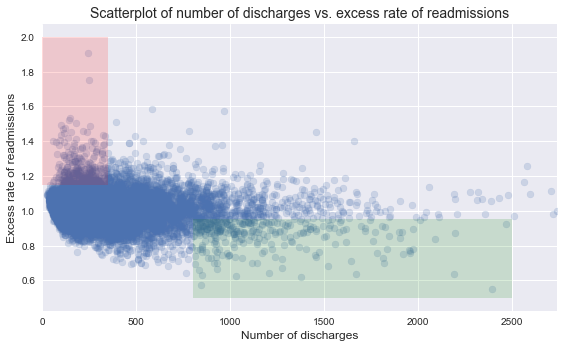

In [57]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

A. I can not agree or disagree with the recommendations made above in the preliminary analysis because the appropriate analysis was not done on the data. The above analysis only refers to the graph and then the means of the two groups but does not run any tests to look at the significance of the results to confirm whether or not the difference in the means actually signifies that the number of discharges correlates to the excessive readmissions ratio. He also uses two separate cutoffs to define hospitals as being small, one uses the cut off of less than 100 discharges and another uses less than 300. 

In [58]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


B. New Statistical Analysis

Null Hypothesis: The number of discharges is not correlated to excessive readmission ratio. Hospitals that are small (discharges < 300) and hospitals that are large (discharge > 300) do not differ significantly in terms of the excessive readmission ratio. 


In [81]:
clean_hospital_read_df = clean_hospital_read_df[np.isfinite(clean_hospital_read_df['Excess Readmission Ratio'])]
cleandf = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']]

scipy.stats.pearsonr(cleandf['Number of Discharges'], cleandf['Excess Readmission Ratio'])

(-0.097397943510793533, 1.222547377680967e-25)

After testing for correlationship we can see that there is no correlation between number of discharges the excessive readmission ratio. The p-value we get is really small, 1.22E-25, which means our results aren't based on chance. Since there isn't a significant correlationship between the two variables we can reject the null hypothesis. The p-value indicates that the slight correlationship that we do get isn't due to chance however and there is some negative relationship between the number of discharges and the excess readmission ratio. 

Statistical significance tells us whether or not the results of our test can disprove the null hypothesis while practical significance takes into account the applicability of the results to real life. They don’t really differ in this case because we can tell that discharge rate the excessive readmission ratio don’t rely on one another, so our suggestions would not be based on the above analysis. I would recommend that the client get more data around hospital size and staffing as well more precise location information, which may help shed more light on what might be causing the excessive readmission ratio. Places in poorer parts of the country or with smaller staffs might have higher excessive readmission ratios. 

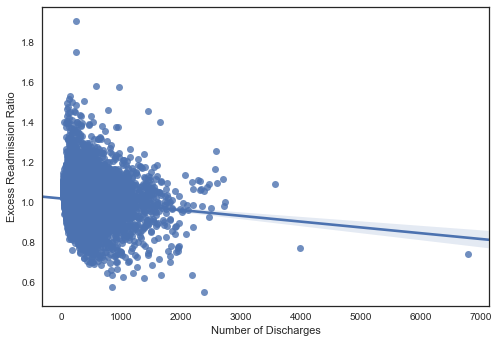

In [80]:
sns.regplot('Number of Discharges', 'Excess Readmission Ratio', data=cleandf)
sns.set_style('whitegrid')
plt.show()

The plot created above is useful for seeing the distribution of the data but doesn’t give a sense of the relationship. The analysis above just highlights two area of the graph and disregards the rest of the data. Most of the data points are excluded from the two colored portions. Adding a regression line lets us see that there actually may not be significant difference to the excessive readmission ratio based on the number of discharges. 
